# In-Depth Sales Performance Analysis for 12 Months of Sales Dataset

Certainly! Before delving into any analysis in Python, it's crucial to import all the essential libraries. These libraries provide functions and tools necessary for data manipulation, visualization, statistical analysis, and more

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import datetime
from itertools import combinations
from collections import Counter

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Merging 12 Months of Data

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob('C:/Users/acer/Desktop/Data_Analytics/PowerBI_Projects/Sales_Dashboard/Sales_Data/*.csv')))

In [3]:
# Shape of the dataset
df.shape

(186850, 6)

In [4]:
df.to_csv("C:/Users/acer/Desktop/Data_Analytics/PowerBI_Projects/Sales_Dashboard/dataset.csv")

In [5]:
# Importing the Merged Dataset
df1 = pd.read_csv("dataset.csv")

In [6]:
# Reading the dataset
df1.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


We have successfully merged all the 12 csv files into the one csv file

### Basic EDA

In [7]:
# Removing Unnecessary columns
Sales_Data = df1.drop(['Unnamed: 0'], axis=1)

In [8]:
Sales_Data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

Hence, we have dropped unnecessary colun from our dataset

In [9]:
# Dataset information
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


As we can see above, data type of all the attributes is object

In [10]:
# Checking for null values
Sales_Data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
Sales_Data.isnull().values.sum()

3270

Dataset has been encountered with 3270 null/empty values 

In [12]:
# Removing null values
Sales_Data_df = Sales_Data.dropna(how='all')

In [13]:
Sales_Data_df.isnull().values.sum()

0

In [14]:
Sales_Data_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

We have reduced null/empty values to 0

In [15]:
# checking for Duplicated records
Sales_Data[Sales_Data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


In [16]:
Sales_Data.duplicated().sum()

1162

Our Dataset contains 1162 duplicated records

In [17]:
# Removing Duplicated records
Sales_data = Sales_Data.drop_duplicates(keep=False)

In [18]:
Sales_data.duplicated().sum()

0

We reduced duplicated records to 0 by dropping them

In [19]:
# Convert Columns to the correct type
Sales_data['Quantity Ordered'] = pd.to_numeric(Sales_data['Quantity Ordered']) #make int
Sales_data['Price Each'] = pd.to_numeric(Sales_data['Price Each']) #make float

In [20]:
Sales_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

We successfully converted data types of 'Quantity Ordered' and 'Price Each' column to the correct type

### Addition of Columns

In [21]:
# Adding Month Column
Sales_data = Sales_data[Sales_data['Order Date'].str[0:2] != 'Or']

In [22]:
Sales_data['Month'] = Sales_data['Order Date'].str[0:2]
Sales_data['Month'] = Sales_data['Month'].astype('int32')

In [23]:
Sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month'],
      dtype='object')

In [24]:
Sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Hence,we added the Month column in the our dataset

In [25]:
# Convert "Order Date" Column from object to datetime 
Sales_data['Order Date']= pd.to_datetime(Sales_data['Order Date'])

In [26]:
Sales_data['Order Date'] = pd.to_datetime(Sales_data['Order Date'], errors='coerce')

In [27]:
# Adding a new column "Month Name" 
Sales_data['Month Name'] = Sales_data['Order Date'].dt.month_name().str[:3]

In [28]:
Sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Apr


In [29]:
# Converting "Order Date" from datetime to object type
Sales_data['Order Date'] = Sales_data['Order Date'].astype(str)

In [30]:
Sales_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Month Name           object
dtype: object

In [31]:
# Sorting Month and Month Name in the correct order
sort_order = ['Jan', 'Feb','Mar','Apr','May','Jun','July','August','Sept','Oct','Nov','Dec']

In [32]:
Sales_data.index = pd.CategoricalIndex(Sales_data['Month Name'], categories=sort_order, ordered=True)

In [33]:
Sales_data.sort_index().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
Month Name,,,,,,,,
Jan,142987,Lightning Charging Cable,1,14.95,2019-01-12 17:05:00,"909 South St, Austin, TX 73301",1,Jan
Jan,146470,Bose SoundSport Headphones,1,99.99,2019-01-17 11:29:00,"442 West St, Atlanta, GA 30301",1,Jan
Jan,146469,AA Batteries (4-pack),2,3.84,2019-01-02 21:45:00,"319 Willow St, Los Angeles, CA 90001",1,Jan
Jan,146468,Bose SoundSport Headphones,1,99.99,2019-01-23 18:55:00,"592 River St, Los Angeles, CA 90001",1,Jan
Jan,146467,Macbook Pro Laptop,1,1700.00,2019-01-25 14:16:00,"950 5th St, Los Angeles, CA 90001",1,Jan


As we can see, I've added Month Name column in the dataset

In [34]:
# Adding Sales Column 
Sales_data['Sales'] = Sales_data['Quantity Ordered'] * Sales_data['Price Each']

In [35]:
Sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales
Month Name,,,,,,,,,
Apr,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,23.90
Apr,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99
Apr,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00
Apr,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99
Apr,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99


In [36]:
Sales_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Month Name           object
Sales               float64
dtype: object

In [37]:
# Adding new column "Hour"
Sales_data['Hour'] = pd.to_datetime(Sales_data['Order Date']).dt.hour

In [38]:
# Adding new column "Minute"
Sales_data['Minute'] = pd.to_datetime(Sales_data['Order Date']).dt.minute

In [39]:
Sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Month Name', 'Sales', 'Hour', 'Minute'],
      dtype='object')

In [40]:
Sales_data.sort_index().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,Hour,Minute
Month Name,,,,,,,,,,,
Jan,142987,Lightning Charging Cable,1,14.95,2019-01-12 17:05:00,"909 South St, Austin, TX 73301",1,Jan,14.95,17,5
Jan,146470,Bose SoundSport Headphones,1,99.99,2019-01-17 11:29:00,"442 West St, Atlanta, GA 30301",1,Jan,99.99,11,29
Jan,146469,AA Batteries (4-pack),2,3.84,2019-01-02 21:45:00,"319 Willow St, Los Angeles, CA 90001",1,Jan,7.68,21,45
Jan,146468,Bose SoundSport Headphones,1,99.99,2019-01-23 18:55:00,"592 River St, Los Angeles, CA 90001",1,Jan,99.99,18,55
Jan,146467,Macbook Pro Laptop,1,1700.00,2019-01-25 14:16:00,"950 5th St, Los Angeles, CA 90001",1,Jan,1700.00,14,16


In [41]:
# Extract city from Purchase Address
Sales_data['city'] = Sales_data['Purchase Address'].str.split(',').str[1]

In [42]:
Sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Month Name', 'Sales', 'Hour', 'Minute',
       'city'],
      dtype='object')

In [43]:
Sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,Hour,Minute,city
Month Name,,,,,,,,,,,,
Apr,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,23.90,8,46,Dallas
Apr,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,22,30,Boston
Apr,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,14,38,Los Angeles
Apr,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,14,38,Los Angeles
Apr,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,9,27,Los Angeles


In [44]:
Sales_data['city'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [45]:
Sales_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [46]:
len(Sales_data['Product'].unique()) #19 unique products

19

In [47]:
Sales_data['Quantity Ordered'].unique()

array([2, 1, 3, 5, 4, 7, 6, 8, 9], dtype=int64)

In [48]:
Sales_data['Price Each'].unique()

array([  11.95,   99.99,  600.  ,   11.99, 1700.  ,   14.95,  389.99,
          3.84,  150.  ,    2.99,  700.  ,  300.  ,  149.99,  109.99,
        999.99,  400.  ,  379.99])

In [49]:
# Unique price of each product
Sales_data.groupby(['Product'])['Price Each'].unique()

Product
20in Monitor                  [109.99]
27in 4K Gaming Monitor        [389.99]
27in FHD Monitor              [149.99]
34in Ultrawide Monitor        [379.99]
AA Batteries (4-pack)           [3.84]
AAA Batteries (4-pack)          [2.99]
Apple Airpods Headphones       [150.0]
Bose SoundSport Headphones     [99.99]
Flatscreen TV                  [300.0]
Google Phone                   [600.0]
LG Dryer                       [600.0]
LG Washing Machine             [600.0]
Lightning Charging Cable       [14.95]
Macbook Pro Laptop            [1700.0]
ThinkPad Laptop               [999.99]
USB-C Charging Cable           [11.95]
Vareebadd Phone                [400.0]
Wired Headphones               [11.99]
iPhone                         [700.0]
Name: Price Each, dtype: object

In [50]:
# Quantity Ordered for each unique product
Sales_data.groupby(['Product'])['Quantity Ordered'].unique()

Product
20in Monitor                                       [1, 2]
27in 4K Gaming Monitor                             [1, 2]
27in FHD Monitor                                   [1, 2]
34in Ultrawide Monitor                             [1, 2]
AA Batteries (4-pack)               [1, 2, 3, 4, 5, 6, 7]
AAA Batteries (4-pack)        [1, 2, 3, 5, 4, 7, 6, 8, 9]
Apple Airpods Headphones                        [1, 2, 3]
Bose SoundSport Headphones                      [1, 2, 3]
Flatscreen TV                                      [1, 2]
Google Phone                                       [1, 2]
LG Dryer                                              [1]
LG Washing Machine                                    [1]
Lightning Charging Cable                     [1, 2, 3, 4]
Macbook Pro Laptop                                 [1, 2]
ThinkPad Laptop                                    [1, 2]
USB-C Charging Cable                   [2, 1, 3, 4, 6, 5]
Vareebadd Phone                                    [1, 2]
Wired 

In [51]:
# Adding State column by extracting city from Purchase Address
Sales_data['State'] = Sales_data['Purchase Address'].str.split(',').str[2]

In [52]:
Sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,Hour,Minute,city,State
Month Name,,,,,,,,,,,,,
Apr,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Apr,23.90,8,46,Dallas,TX 75001
Apr,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Apr,99.99,22,30,Boston,MA 02215
Apr,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,14,38,Los Angeles,CA 90001
Apr,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,14,38,Los Angeles,CA 90001
Apr,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Apr,11.99,9,27,Los Angeles,CA 90001


In [53]:
Sales_data['State'].unique()

array([' TX 75001', ' MA 02215', ' CA 90001', ' CA 94016', ' WA 98101',
       ' GA 30301', ' NY 10001', ' OR 97035', ' TX 73301', ' ME 04101'],
      dtype=object)

In [54]:
# city in each state
Sales_data.groupby(['State'])['city'].unique()

State
 CA 90001      [ Los Angeles]
 CA 94016    [ San Francisco]
 GA 30301          [ Atlanta]
 MA 02215           [ Boston]
 ME 04101         [ Portland]
 NY 10001    [ New York City]
 OR 97035         [ Portland]
 TX 73301           [ Austin]
 TX 75001           [ Dallas]
 WA 98101          [ Seattle]
Name: city, dtype: object

### Which Month Generated the highest revenue and how much??

In [55]:
highestRevenueMonth = Sales_data.sort_index().groupby(['Month'], sort=True)['Sales'].sum()

Text(0.5, 0, 'Month')

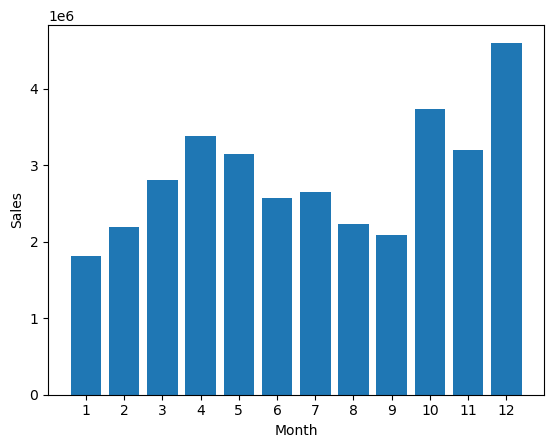

In [56]:
months = range(1,13)
plt.bar(months, highestRevenueMonth)
plt.xticks(months)
plt.ylabel("Sales")
plt.xlabel("Month")

December yields the highest revenue, totaling $4,603,148.06.

### Which city generated the highest revenue and how much?

In [57]:
highestRevenueCity = Sales_data.groupby(['city'], sort=True)['Sales'].sum()

In [58]:
highestRevenueCity

city
 Atlanta          2792899.56
 Austin           1816506.91
 Boston           3655613.29
 Dallas           2762772.52
 Los Angeles      5444037.76
 New York City    4659416.85
 Portland         2318173.27
 San Francisco    8247283.19
 Seattle          2742336.56
Name: Sales, dtype: float64

Text(0.5, 0, 'City Name')

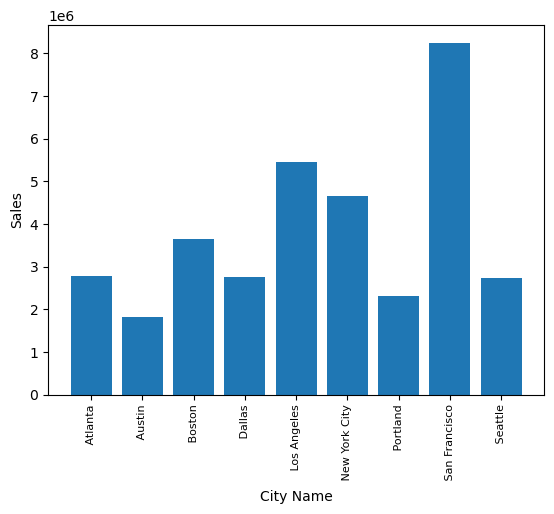

In [59]:
cities = [city for city, df in Sales_data.groupby('city')]
plt.bar(cities, highestRevenueCity)
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("Sales")
plt.xlabel("City Name")

San Francisco generated the highest revenue of total $8,247,283.19

### Which State generated the highest revenue and how much?

In [60]:
highestRevenueState = Sales_data.groupby(['State'], sort=True)['Sales'].sum()

In [61]:
highestRevenueState

State
 CA 90001    5444037.76
 CA 94016    8247283.19
 GA 30301    2792899.56
 MA 02215    3655613.29
 ME 04101     448884.49
 NY 10001    4659416.85
 OR 97035    1869288.78
 TX 73301    1816506.91
 TX 75001    2762772.52
 WA 98101    2742336.56
Name: Sales, dtype: float64

Text(0.5, 0, 'State')

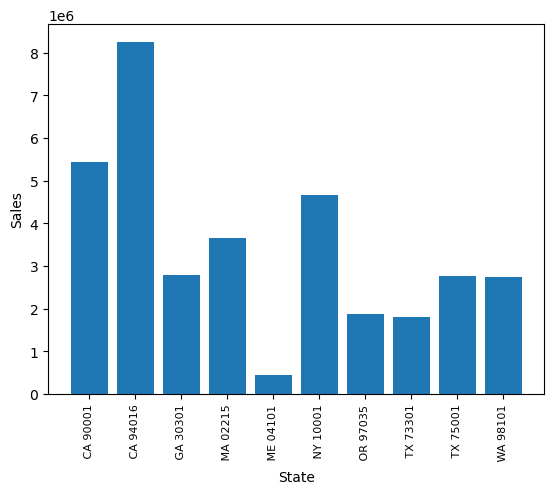

In [62]:
states = [state for state, df in Sales_data.groupby('State')]
plt.bar(states, highestRevenueState)
plt.xticks(states, rotation="vertical", size=8)
plt.ylabel("Sales")
plt.xlabel("State")

The state with the highest revenue generation is CA 94016, with San Francisco city located within it.

### What time should we display advertisements to maximize liklihood of customer's buying product?

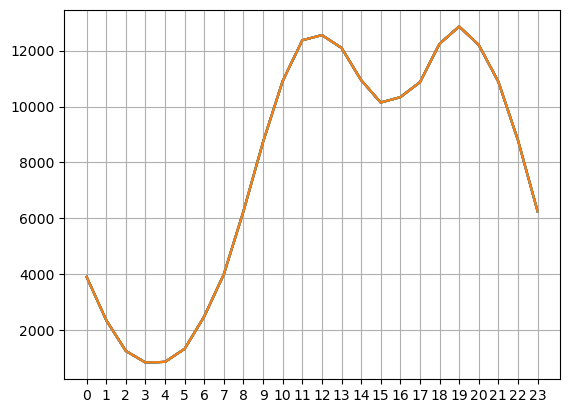

In [63]:
hours = [hour for hour, df in Sales_data.groupby('Hour')]

plt.plot(hours, Sales_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

At the peak time of 11am and 7pm is the best timing to display advertisements to maximize liklihood of customer's buying the product

### What products are most often sold together? 

In [64]:
df = Sales_data[Sales_data['Order ID'].duplicated(keep=False)]

In [65]:
df.head(30)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,Hour,Minute,city,State
Month Name,,,,,,,,,,,,,
Apr,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,600.00,14,38,Los Angeles,CA 90001
Apr,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Apr,11.99,14,38,Los Angeles,CA 90001
Apr,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Apr,600.00,19,42,Los Angeles,CA 90001
Apr,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Apr,11.95,19,42,Los Angeles,CA 90001
Apr,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,Apr,5.98,17,0,San Francisco,CA 94016
Apr,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,Apr,600.00,17,0,San Francisco,CA 94016
Apr,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,Apr,14.95,11,7,New York City,NY 10001
Apr,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,Apr,11.95,11,7,New York City,NY 10001
Apr,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,Apr,150.00,10,39,Seattle,WA 98101


In [66]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
Month Name,,
Apr,176560,"Google Phone,Wired Headphones"
Apr,176574,"Google Phone,USB-C Charging Cable"
Apr,176586,"AAA Batteries (4-pack),Google Phone"
Apr,176672,"Lightning Charging Cable,USB-C Charging Cable"
Apr,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [67]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 84
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### What Products Sold the most ?

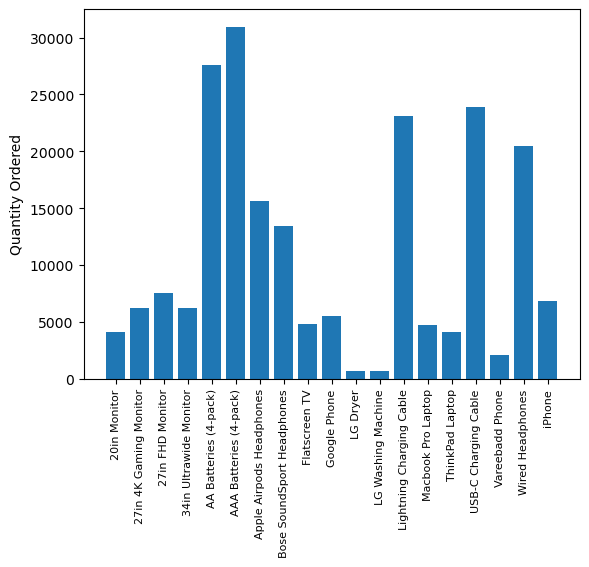

In [68]:
product_group = Sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xticks(products, rotation='vertical', size=8)
plt.show()

AAA Batteries (4-pack) is the most ordered product or the top selling product

### What are the top 5 Best selling products?

In [72]:
Sales_data.groupby(['Product'])['Quantity Ordered'].sum().nlargest(5)

Product
AAA Batteries (4-pack)      30955
AA Batteries (4-pack)       27595
USB-C Charging Cable        23887
Lightning Charging Cable    23121
Wired Headphones            20491
Name: Quantity Ordered, dtype: int64

### Which Product generates the highest revenue?

In [69]:
# Product Wise Revenue
highestRevenueProduct = Sales_data.groupby(['Product'], sort=True)['Sales'].sum()
highestRevenueProduct

Product
20in Monitor                   453488.77
27in 4K Gaming Monitor        2431197.66
27in FHD Monitor              1129724.68
34in Ultrawide Monitor        2350238.15
AA Batteries (4-pack)          105964.80
AAA Batteries (4-pack)          92555.45
Apple Airpods Headphones      2341950.00
Bose SoundSport Headphones    1340165.97
Flatscreen TV                 1442100.00
Google Phone                  3315600.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       345658.95
Macbook Pro Laptop            8027400.00
ThinkPad Laptop               4125958.74
USB-C Charging Cable           285449.65
Vareebadd Phone                827200.00
Wired Headphones               245687.09
iPhone                        4791500.00
Name: Sales, dtype: float64

Macbook Pro Laptop is the product which generates the highest revenue of $8,027,400.00

Text(0.5, 0, 'Product')

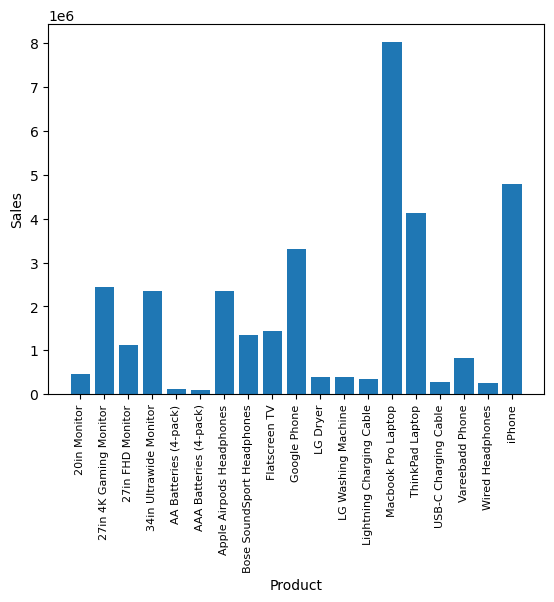

In [70]:
products = [products for products, df in Sales_data.groupby('Product')]
plt.bar(products, highestRevenueProduct)
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Sales")
plt.xlabel("Product")

### What are the Top5 Products Generating the highest revenue?

In [76]:
highestRevenueProduct = Sales_data.groupby(['Product'], sort=True)['Sales'].sum().nlargest(5)
highestRevenueProduct

Product
Macbook Pro Laptop        8027400.00
iPhone                    4791500.00
ThinkPad Laptop           4125958.74
Google Phone              3315600.00
27in 4K Gaming Monitor    2431197.66
Name: Sales, dtype: float64

In [77]:
Sales_data.sort_index().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,Hour,Minute,city,State
Month Name,,,,,,,,,,,,,
Jan,142987,Lightning Charging Cable,1,14.95,2019-01-12 17:05:00,"909 South St, Austin, TX 73301",1,Jan,14.95,17,5,Austin,TX 73301
Jan,146470,Bose SoundSport Headphones,1,99.99,2019-01-17 11:29:00,"442 West St, Atlanta, GA 30301",1,Jan,99.99,11,29,Atlanta,GA 30301
Jan,146469,AA Batteries (4-pack),2,3.84,2019-01-02 21:45:00,"319 Willow St, Los Angeles, CA 90001",1,Jan,7.68,21,45,Los Angeles,CA 90001
Jan,146468,Bose SoundSport Headphones,1,99.99,2019-01-23 18:55:00,"592 River St, Los Angeles, CA 90001",1,Jan,99.99,18,55,Los Angeles,CA 90001
Jan,146467,Macbook Pro Laptop,1,1700.00,2019-01-25 14:16:00,"950 5th St, Los Angeles, CA 90001",1,Jan,1700.00,14,16,Los Angeles,CA 90001


In [78]:
# Saving the data in the CSV format for report building
Sales_data.to_csv("C:/Users/acer/Desktop/Data_Analytics/PowerBI_Projects/Sales_Dashboard/Cleaned_data.csv")